In [1]:
from supar import Parser
import torch
import networkx as nx
2

In [2]:
torch.cuda.empty_cache()

In [3]:
torch.cuda.set_device('cuda:0')

In [4]:
sin = Parser.load('dep-biaffine-roberta-en')

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
sentence = 'I saw Sarah, with a telescope.'

In [18]:
lista = []

for i in range(10):
    lista.append(sentence)

In [25]:
sintactic_tree = sin.predict(lista, verbose=False, lang='en')

In [26]:
sintactic_tree[1]

1	I	_	_	_	_	2	nsubj	_	_
2	saw	_	_	_	_	0	root	_	_
3	Sarah	_	_	_	_	2	dobj	_	_
4	,	_	_	_	_	2	punct	_	_
5	without	_	_	_	_	2	prep	_	_
6	a	_	_	_	_	7	det	_	_
7	telescope	_	_	_	_	5	pobj	_	_
8	.	_	_	_	_	2	punct	_	_

In [18]:
sintactic_tree[0].values()

TypeError: 'list' object is not callable

In [14]:
lista

[['I', 'saw', 'Sarah', ',', 'with', 'a', 'telescope', '.'],
 ['I', 'saw', 'Sarah', ',', 'with', 'a', 'telescope', '.'],
 ['I', 'saw', 'Sarah', ',', 'with', 'a', 'telescope', '.'],
 ['I', 'saw', 'Sarah', ',', 'with', 'a', 'telescope', '.'],
 ['I', 'saw', 'Sarah', ',', 'with', 'a', 'telescope', '.'],
 ['I', 'saw', 'Sarah', ',', 'with', 'a', 'telescope', '.'],
 ['I', 'saw', 'Sarah', ',', 'with', 'a', 'telescope', '.'],
 ['I', 'saw', 'Sarah', ',', 'with', 'a', 'telescope', '.'],
 ['I', 'saw', 'Sarah', ',', 'with', 'a', 'telescope', '.'],
 ['I', 'saw', 'Sarah', ',', 'with', 'a', 'telescope', '.']]

In [17]:
sintactic_tree

1	I	_	_	_	_	2	nsubj	_	_
2	saw	_	_	_	_	0	root	_	_
3	Sarah	_	_	_	_	2	dobj	_	_
4	,	_	_	_	_	3	punct	_	_
5	with	_	_	_	_	3	prep	_	_
6	a	_	_	_	_	7	det	_	_
7	telescope	_	_	_	_	5	pobj	_	_
8	.	_	_	_	_	2	punct	_	_

Usando el método values podemos obtener la información completa del árbol sintáctico para cada una de las palabras.

In [6]:
sintactic_tree.values

[('1', '2', '3', '4', '5', '6', '7'),
 ('I', 'saw', 'Sarah', 'with', 'a', 'telescope', '.'),
 ('_', '_', '_', '_', '_', '_', '_'),
 ('_', '_', '_', '_', '_', '_', '_'),
 ('_', '_', '_', '_', '_', '_', '_'),
 ('_', '_', '_', '_', '_', '_', '_'),
 [2, 0, 2, 2, 6, 4, 2],
 ['nsubj', 'root', 'dobj', 'prep', 'det', 'pobj', 'punct'],
 ('_', '_', '_', '_', '_', '_', '_'),
 ('_', '_', '_', '_', '_', '_', '_')]

In [7]:
sintactic_graph = nx.DiGraph()

In [8]:
for i in range(len(sintactic_tree.values[1])):
    sintactic_graph.add_node(i+1, word=sintactic_tree.values[1][i])

En este caso, creamos el grafo para que las relaciones vayan desde el nodo padre a los nodos hijos, representandoe estas relaciones con el tipo de elemento de acuerdo a CoNLL.

In [9]:
for i in range(len(sintactic_tree.values[6])):
    parent = int(sintactic_tree.values[6][i])
    if parent == 0:
        continue
    else:
        child = int(sintactic_tree.values[0][i])
        sintactic_graph.add_edge(parent, child, label=sintactic_tree.values[7][i])

In [10]:
sintactic_graph.edges(data=True)

OutEdgeDataView([(2, 1, {'label': 'nsubj'}), (2, 3, {'label': 'dobj'}), (2, 4, {'label': 'prep'}), (2, 7, {'label': 'punct'}), (4, 6, {'label': 'pobj'}), (6, 5, {'label': 'det'})])

In [11]:
sintactic_graph.nodes(data=True)

NodeDataView({1: {'word': 'I'}, 2: {'word': 'saw'}, 3: {'word': 'Sarah'}, 4: {'word': 'with'}, 5: {'word': 'a'}, 6: {'word': 'telescope'}, 7: {'word': '.'}})

In [12]:
sintactic_graph.graph['property'] = 'sintactic'
sintactic_graph.graph['id'] = "example_1"
sintactic_graph.graph['model'] = 'dep-biaffine-roberta-en'

In [13]:
sintactic_graph.graph

{'property': 'sintactic',
 'id': 'example_1',
 'model': 'dep-biaffine-roberta-en'}

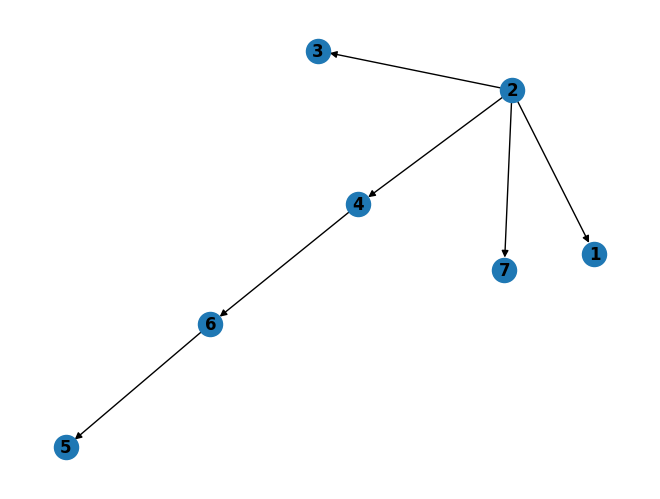

In [14]:
# Podemos visualizar el grafo sintáctico actual
#import pydot
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
nx.draw_kamada_kawai(sintactic_graph, with_labels=True, font_weight='bold')